### Problem Statement:  
Create a Sentiment Analysis Machine Learning model on the Amazon review dataset. ( Positive or Negative) Analyze the Dataset, visualize it with WordCloud, and choose the best parameter using Cross-Validation. Deploy it on Flask App or Streamlight.
###### Note: Choose any Reviews dataset on Kaggle.

## importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#Text Preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
#model training and tuning
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#ignore the warnings from sklearn
import warnings
warnings.filterwarnings('ignore')

In [4]:
### reading the amazon kindle store data reviews

df = pd.read_csv("kindle_reviews.csv")
df.head(10)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
5,5,B000F83SZQ,"[0, 0]",4,A beautiful in-depth character description mak...,"05 26, 2014",A1RK2OCZDSGC6R,ubavka seirovska,Review,1401062400
6,6,B000F83SZQ,"[0, 0]",4,I enjoyed this one tho I'm not sure why it's c...,"06 10, 2014",A2HSAKHC3IBRE6,Wolfmist,Nice old fashioned story,1402358400
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400
8,8,B000FA64PA,"[0, 0]",5,Darth Maul working under cloak of darkness com...,"10 11, 2013",A1UG4Q4D3OAH3A,dsa,Darth Maul,1381449600
9,9,B000FA64PA,"[0, 0]",4,This is a short story focused on Darth Maul's ...,"02 13, 2011",AQZH7YTWQPOBE,Enjolras,"Not bad, not exceptional",1297555200


In [5]:
### lets see what kaggle actually given for each column
## what it is saying about the each column

"""Columns
asin - ID of the product, like B000FA64PK
helpful - helpfulness rating of the review - example: 2/3.
overall - rating of the product.
reviewText - text of the review (heading).
reviewTime - time of the review (raw).
reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
reviewerName - name of the reviewer.
summary - summary of the review (description).
unixReviewTime - unix timestamp."""

'Columns\nasin - ID of the product, like B000FA64PK\nhelpful - helpfulness rating of the review - example: 2/3.\noverall - rating of the product.\nreviewText - text of the review (heading).\nreviewTime - time of the review (raw).\nreviewerID - ID of the reviewer, like A3SPTOKDG7WBLN\nreviewerName - name of the reviewer.\nsummary - summary of the review (description).\nunixReviewTime - unix timestamp.'

In [6]:
### clearly observe that column 'Unnamed: 0' we can ignore 

df.drop("Unnamed: 0",axis =1 ,inplace = True)

In [7]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [8]:
## convert the "reviewTime", to datetime column

import datetime
from datetime import datetime

df["reviewTime"] =pd.to_datetime(df["reviewTime"])

In [9]:
type(df["reviewTime"])


pandas.core.series.Series

In [10]:
### now we are talking the year from the " reviewTime" 

df["Year"] = df["reviewTime"].dt.year

In [11]:
df.isnull().sum()

asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
Year                 0
dtype: int64

In [12]:
### we are dropping  some reviewText  because they are null,and we have problem based on the reviewText  only
df.dropna(subset = ['reviewText'], inplace = True)

In [13]:
df.dropna(subset = ['summary'], inplace = True)

In [14]:
df.overall.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [15]:
df.overall.value_counts()

5    575245
4    254010
3     96193
2     34130
1     23018
Name: overall, dtype: int64

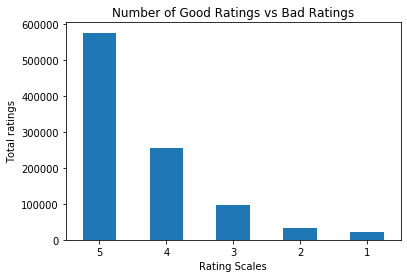

In [16]:
#### lets plot the graph to see which are in huge number

df.overall.value_counts().plot(kind = "bar")
plt.title('Number of Good Ratings vs Bad Ratings')
plt.xlabel('Rating Scales')
plt.xticks(rotation = 0)
plt.ylabel('Total ratings')
plt.show()

In [17]:
#the overall average review on all the ratings. Seems to be skewed to have above average ratings.
df.overall.mean()

4.347790953759225

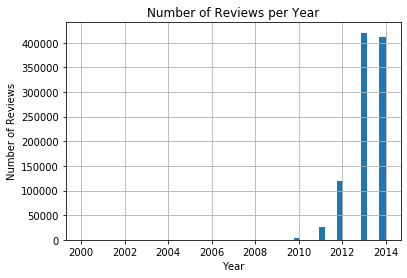

In [18]:
### lets see in which year reviews are more and from which year the reviews are actually has effects on product

df['Year'].hist(bins=50)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

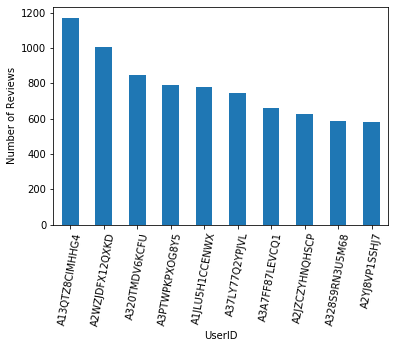

In [19]:
#top 10 users base on the number of reviews made
df.reviewerID.value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.xlabel('UserID')
plt.ylabel('Number of Reviews')
plt.show()

### Text Preprocessing
The following cells provide the steps taken to preprocess the review texts for better feature extraction. Once the text has been preprocessed, it can then be used to develop a vocabulary for training.

    1.Removing punctuations
    2.Removing non alphabetical words
    3.Lowercasing all words
    4.Removing stopwords
    5.Lemmatization to reduce words to their base form

In [20]:
import re
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords

In [21]:
#created a dataframe that only contains the reviewText and the overall scoring of item
reviews = df[['reviewText', 'overall']]
reviews.head()

,reviewText,overall
0,I enjoy vintage books and movies so I enjoyed ...,5
1,This book is a reissue of an old one; the auth...,4
2,This was a fairly interesting read. It had ol...,4
3,I'd never read any of the Amy Brewster mysteri...,5
4,"If you like period pieces - clothing, lingo, y...",4


In [22]:
reviews.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [23]:
len  = (reviews.reviewText)

In [24]:
#### lets see and examine the one review that will let us know what should we have do

print('Original Text: ' + str(reviews['reviewText'][1]))

Original Text: This book is a reissue of an old one; the author was born in 1910. It's of the era of, say, Nero Wolfe. The introduction was quite interesting, explaining who the author was and why he's been forgotten; I'd never heard of him.The language is a little dated at times, like calling a gun a &#34;heater.&#34;  I also made good use of my Fire's dictionary to look up words like &#34;deshabille&#34; and &#34;Canarsie.&#34; Still, it was well worth a look-see.


In [25]:
#create an empty mapping table from the str object to strip punctuation from the words
punc = str.maketrans('', '', string.punctuation)

In [26]:
#apply the empty mapping table to each element of the series where x is the review for one document.

reviews['reviewText'] = reviews['reviewText'].apply(lambda x : ' '.join(word.translate(punc) for word in x.split()))
print('Punctuation Remove: ' + str(reviews['reviewText'][1]))

Punctuation Remove: This book is a reissue of an old one the author was born in 1910 Its of the era of say Nero Wolfe The introduction was quite interesting explaining who the author was and why hes been forgotten Id never heard of himThe language is a little dated at times like calling a gun a 34heater34 I also made good use of my Fires dictionary to look up words like 34deshabille34 and 34Canarsie34 Still it was well worth a looksee


In [27]:
#removing words that is non alpha
reviews['reviewText'] = reviews['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))
print('Alphabetical Words: '+ str(reviews['reviewText'][1]))

Alphabetical Words: This book is a reissue of an old one the author was born in Its of the era of say Nero Wolfe The introduction was quite interesting explaining who the author was and why hes been forgotten Id never heard of himThe language is a little dated at times like calling a gun a I also made good use of my Fires dictionary to look up words like and Still it was well worth a looksee


In [28]:
#making all words to be lowercase
reviews['reviewText'] = reviews['reviewText'].apply(lambda x: ' '.join(word.lower() for word in x.split()))
print('Lowercase Words : '+ str(reviews['reviewText'][1]))

Lowercase Words : this book is a reissue of an old one the author was born in its of the era of say nero wolfe the introduction was quite interesting explaining who the author was and why hes been forgotten id never heard of himthe language is a little dated at times like calling a gun a i also made good use of my fires dictionary to look up words like and still it was well worth a looksee


In [29]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
#list of stop words
stop = stopwords.words('english')

#removing the stop words
reviews['reviewText'] = reviews['reviewText'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop))
print('Stopwords Remove: ' + str(reviews['reviewText'][1]))


Stopwords Remove: book reissue old one author born era say nero wolfe introduction quite interesting explaining author hes forgotten id never heard himthe language little dated times like calling gun also made good use fires dictionary look words like still well worth looksee


In [31]:
#Lemmatize words to reduce them to their root form. Note: added the pos = 'v' to reduce the incoming word to verb root
lem = WordNetLemmatizer()
reviews['reviewText'] = reviews['reviewText'].apply(lambda x : ' '.join(lem.lemmatize(word, pos = 'v') for word in x.split()))
print('Lemmatized Text: ' + str(reviews['reviewText'][1]))

Lemmatized Text: book reissue old one author bear era say nero wolfe introduction quite interest explain author hes forget id never hear himthe language little date time like call gun also make good use fire dictionary look word like still well worth looksee


In [32]:
reviews['overall'] = reviews['overall'].apply(lambda x : 1  if x>2  else 0)

In [33]:
reviews['overall'].head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: overall, Length: 100, dtype: int64

In [34]:
reviews['overall'].value_counts()

1    925448
0     57148
Name: overall, dtype: int64

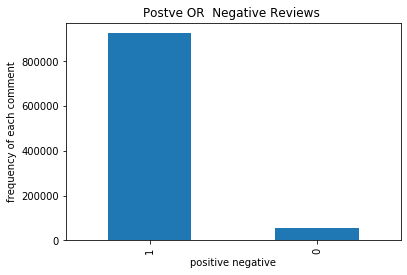

In [35]:
reviews['overall'].value_counts().plot(kind ="bar")
plt.title("Postve OR  Negative Reviews ")
plt.xlabel("positive negative")
plt.ylabel("frequency of each comment")
plt.show()

In [54]:
X = reviews['reviewText']
y = reviews['overall']

In [55]:
X.head()

0    enjoy vintage book movies enjoy read book plot...
1    book reissue old one author bear era say nero ...
2    fairly interest read old style terminologyi gl...
3    id never read amy brewster mysteries one reall...
4    like period piece clothe lingo enjoy mystery a...
Name: reviewText, dtype: object

In [69]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: overall, dtype: int64

In [72]:
data = pd.DataFrame(X)

In [73]:
data['outcome'] = y

In [74]:
data.columns

Index(['reviewText', 'outcome'], dtype='object')

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['reviewText'],data.outcome,test_size=.3,random_state=0)

In [77]:
vectorizer = CountVectorizer()

In [79]:
x_train_count = vectorizer.fit_transform(X_train.values)


In [80]:
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
x_test_count = vectorizer.transform(X_test) 
model.score(x_test_count,y_test)

0.9497386177441405

In [88]:
counts = TfidfVectorizer()

In [89]:
x_train_tfidf = counts.fit_transform(X_train.values)
x_test_tfidf =  counts.transform(X_test)

In [90]:
model.fit(x_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
model.score(x_test_tfidf,y_test)

0.9419734784363879